In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio #Windows users may need to use "import imageio.v2" instead
plt.rcParams['figure.figsize'] = (10,10)

#imageio is a package that I used to create the animation may need to use: pip install imageio

In [7]:
def solar_system_animation(image_num):
    
    '''This function creates an animation of the inner 6 planets of our solar system.
        It is not to scale but orbital radii and orbital speeds are roughly correct 
        relative to the other planets. Adjustments were made for ease of viewing
        and smoothness of the animation.
        
        Inputs: Integer number of images user would like to create to make the gif
        Outputs: Specified number of .pngs and an animated .gif'''
    
    mxs = []     #Empty lists that will hold the x and y coordinates of the various planets 
    mys = []     #Mercury
    vxs = []
    vys = []     #Venus
    exs = []
    eys = []     #Mars
    maxs = []
    mays = []    #Mars
    jxs = []
    jys = []     #Jupiter
    sxs = []
    sys = []     #Saturn

    #Orbital radii of the respective planets. Mercury's radius was chosen so that it looked decent and the 
    #others were scaled relative to Mercury. 
    mr,vr,er,mar,jr,sr= 10,20,26,38,65,100
    #Starting theta values - all planets start on positive x-axis at (Radius,0)
    mtheta,vtheta,etheta,matheta,jtheta,stheta = 0,0,0,0,0,0

    #Calculates (x,y) for each planet, appends it to the correspoding list and updates theta for each planet
    for i in range(image_num):
        mx = mr*np.cos(mtheta)
        my = mr*np.sin(mtheta)
        mxs.append(mx)
        mys.append(my)
        vx = vr*np.cos(vtheta)
        vy = vr*np.sin(vtheta)
        vxs.append(vx)
        vys.append(vy)
        ex = er*np.cos(etheta)
        ey = er*np.sin(etheta)
        exs.append(ex)
        eys.append(ey)
        max1 = mar*np.cos(matheta)
        may = mar*np.sin(matheta)
        maxs.append(max1)
        mays.append(may)
        jx = jr*np.cos(jtheta)
        jy = jr*np.sin(jtheta)
        jxs.append(jx)
        jys.append(jy)
        sx = sr*np.cos(stheta)
        sy = sr*np.sin(stheta)
        sxs.append(sx)
        sys.append(sy)
    
        mtheta += .4    #Orbital speed is controlled by how much theta increases at each time step.
        vtheta += .35   #Larger values mean faster orbits, smaller values mean slower orbits.
        etheta += .28   #Values were chosen so that the planet moved at least 1 diameter
        matheta += .2   #for each time step. 
        jtheta += .14
        stheta += .08
    
    #Created a figure, set the background color to black and plotted a yellow star at (0,0) to be the Sun.
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_facecolor('k')
    ax.scatter(0,0,s=200,c='y',marker='*')
    plt.title('Six Planet Solar System Animation',size=20)
    size = 15

    #Added the starting posistion of each planet to the figure
    ax.scatter(mxs[0],mys[0],c='grey',s=size)
    ax.scatter(vxs[0],vys[0],c='y',s=size*2.5)
    ax.scatter(exs[0],eys[0],c='b',s=size*2.6)
    ax.scatter(maxs[0],mays[0],c='r',s=size*1.4)
    ax.scatter(jxs[0],jys[0],c='m',s=size*28)
    ax.scatter(sxs[0],sys[0],c='w',s=size*23.5)

    plt.xlim(-sr-10,sr+10) #Sets the x and y limits to be 10 larger than Saturn's orbital radius
    plt.ylim(-sr-10,sr+10)
    
    #Creates a scatter plot of the planets at the (x,y) coordinates calculated above showing the planet's orbit.
    #A black circle is then plotted over the previous posistion so that at each time step only current
    #position is shown. Each scatter plot is then saved as a .png. 
    for i in range(len(mxs)-1):
        ax.scatter(mxs[i+1],mys[i+1],c='grey',s=size)
        ax.scatter(mxs[i],mys[i],c='k')
        ax.scatter(vxs[i+1],vys[i+1],c='yellow',s=size*2.5)
        ax.scatter(vxs[i],vys[i],c='k',s=size*2.5+10)
        ax.scatter(exs[i+1],eys[i+1],c='blue',s=size*2.6)
        ax.scatter(exs[i],eys[i],c='k',s=size*2.6+10)
        ax.scatter(maxs[i+1],mays[i+1],c='r',s=size*1.4)
        ax.scatter(maxs[i],mays[i],c='k',s=size*1.4+10)
        ax.scatter(jxs[i+1],jys[i+1],c='m',s=size*28)
        ax.scatter(jxs[i],jys[i],c='k',s=size*28+10)
        ax.scatter(sxs[i+1],sys[i+1],c='w',s=size*23.5)
        ax.scatter(sxs[i],sys[i],c='k',s=size*23.5+20)
    
      
        plt.savefig('image'+str(i)+'.png') #Saves the .pngs as image0.png,image1.png ... imagei.png
        
    #This reads in each image created above into a list of images
    images = []
    for k in range(0,len(mxs)-1):
        images.append(imageio.imread("image"+str(k)+'.png'))
    
    #Uses imageio.mimsave() to create a gif using our list of image    
    imageio.mimsave("solarsystem.gif", images, duration = 1/10)
    #Duration corresponds to fps i.e. 1/10 means 10 frames per second

# Warning! Running the cell below will create .png images and save them to the current folder. 
I have included the finished gif in my submission and it is embedded below so there is no need to run the next cell. If you would like to, to make sure my code runs I would suggest using a smaller number ~10. I created my gif with 150 images but it takes ~20 min to run with that many images. 

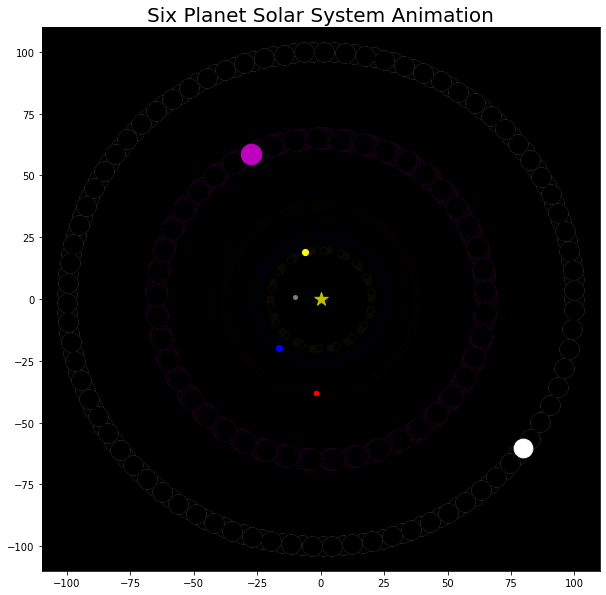

In [9]:
#Runs the function to create the images and correspoding gif
solar_system_animation(10)

Animation of the solar system: \
Yellow Star - Sun \
Grey Circle - Mercury \
Yellow Circle - Venus \
Blue Circle - Earth \
Red Circle - Mars \
Magenta Circle - Jupiter \
White Circle - Saturn 

[SolarSystem](SolarSystemFinal.gif 'SolarSystem')